<h3>Business Problem</h3>

* Which brands have higher reviews.
* which brands products are mostly recommended?
* which gaming products has higher positive/negative reviews?

<h3>Business solutions</h3>:
* can we associate positive and negative words/sentiments for each gaming productBy using Sentiment analysis, we can predict scores for reviews based on certain words


<h3>Potential suggestion for product reviews</h3>:
* Product X is highly rated on the market, it seems most people like its lightweight sleek design and fast speeds. Most products that were associated with negative reviews seemed to indicate that they were too heavy and they couldn't fit them in the bags. We suggest that next gen models for e-readers are lightweight and portable, based on this data we've looked at.
<h3>Assumptions</h3>:

* We're assuming that sample size of 5K examples are sufficient to represent the entire population of reviews.
* We're assuming that the information we find in the text reviews of each product will be rich enough to train a sentiment analysis classifier with accuracy (hopefully) > 70%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
%matplotlib inline 

<h3>Data collection</h3>Collected from Data.word.org. Data is about the gaming products(GameStop is an American video game, consumer electronics, and gaming merchandise retailer.)

In [2]:
df=pd.read_csv('Gamestop_review.csv')
df.head()

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56
2,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229174444,178b3b03-2c56-5abc-a016-c74c2633c9c2,16/01/2022 16:17:56
3,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Weeto,Unbelievable picture quality!,I’ve only had my new Visio OLED65 mounted and ...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,2.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229167959,16e925e3-1e59-537e-aa67-1675b613d351,16/01/2022 16:17:56
4,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,LexusSC400,Vizio OLED,The picture is very crisp and the blacks very ...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229131414,bc017585-3bc1-5a37-9e58-f0bed6de9a72,16/01/2022 16:17:56


* We can potentially refine sentiment analysis with the reviews_description column, with the actual rating of recommended_reviews column (boolean)
* We can also label each review based on each sentiment
* title can contain positive/negative/neutral information about review

In [3]:
data = df.copy()
data.describe()

,sku,helpful_count,not_helpful_count,rating,average_rating,reviews_count,comment_id
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03
mean,328932.494238,1.132949,0.873026,4.355741,4.408482,557.925523,1.462754e+08
std,246778.746328,3.746508,4.813523,1.124101,0.356394,521.627348,6.564770e+07
min,106427.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.343211e+07
25%,173787.000000,0.000000,0.000000,4.000000,4.272700,136.000000,1.203983e+08
50%,277492.000000,0.000000,0.000000,5.000000,4.422100,424.000000,1.358375e+08
75%,316366.000000,1.000000,0.000000,5.000000,4.615600,643.000000,2.123265e+08
max,954016.000000,103.000000,125.000000,5.000000,5.000000,2390.000000,1.109150e+09


* Based on the descriptive statistics above, we see the following:

>Average  of 4.81, with fair standard deviation
Most review are positive from 2nd quartile onwards
The average for number of reviews helpful (Helpfull_count) is 1.13 but high standard deviation
The data are pretty spread out around the mean.
The range of most reviews will be between 0-4 people finding helpful similarly 0-5 people found it not helpful.
The most helpful review was helpful to 103 people and most not helpful found out on 125.


In [4]:
data["brand"].unique()

array(['VIZIO', 'Microsoft', 'Nintendo', 'Square Enix', 'Little Orbit',
       'PowerA', 'Maximum Games', 'Hasbro', 'Jazwares', 'Ja-Ru',
       'ENHANCE', 'License 2 Play', 'Capcom', 'XSEED Games', 'LucidSound',
       'Jada Toys', 'Warner Bros. Interactive Entertainment', 'Sony',
       'PhatMojo', 'Deep Silver', 'Electronic Arts', 'U&I Entertainment',
       'RIG', 'Bandai', 'THQ Nordic', 'Funko', 'JVC', 'Honey-Can-Do',
       'Paladone', 'Skinit', 'AreYouGame', 'Toynk', 'McFarlane Toys',
       'KidKraft', "Rubie's Costume Company", 'Ubisoft', 'Garmin',
       'Big Ben', 'EPOS', 'Rayovac', '2K Games', 'InComm', 'PopCap Games',
       'SEGA', 'Samsung', 'PNP Depot', 'Energizer', 'Bethesda Softworks',
       'Yok', 'GPX', 'Apple', 'LucasArts', 'Aluratek',
       'Bioworld Merchandising', 'D3 Publisher of America', 'Geeknet',
       'Rockstar Games', 'Merge Games', 'Hyperkin', 'Replay Games',
       'Uncanny Brands', 'Activision', 'Turtle Beach',
       'Learning Resources', 'WITHit', 

In [5]:
brand_unique = len(data["brand"].unique())
print("Number of Unique Brands: " + str(brand_unique))

Number of Unique Brands: 70


<h5> checking ratings count 

In [105]:
fig = px.histogram(data, x="rating")
fig.update_traces(marker_color="cornflowerblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Products rating')
fig.show()

><h3>as per the above ratings graph, Majority of examples were rated highly. There is twice amount of 5 star ratings than the others ratings combined

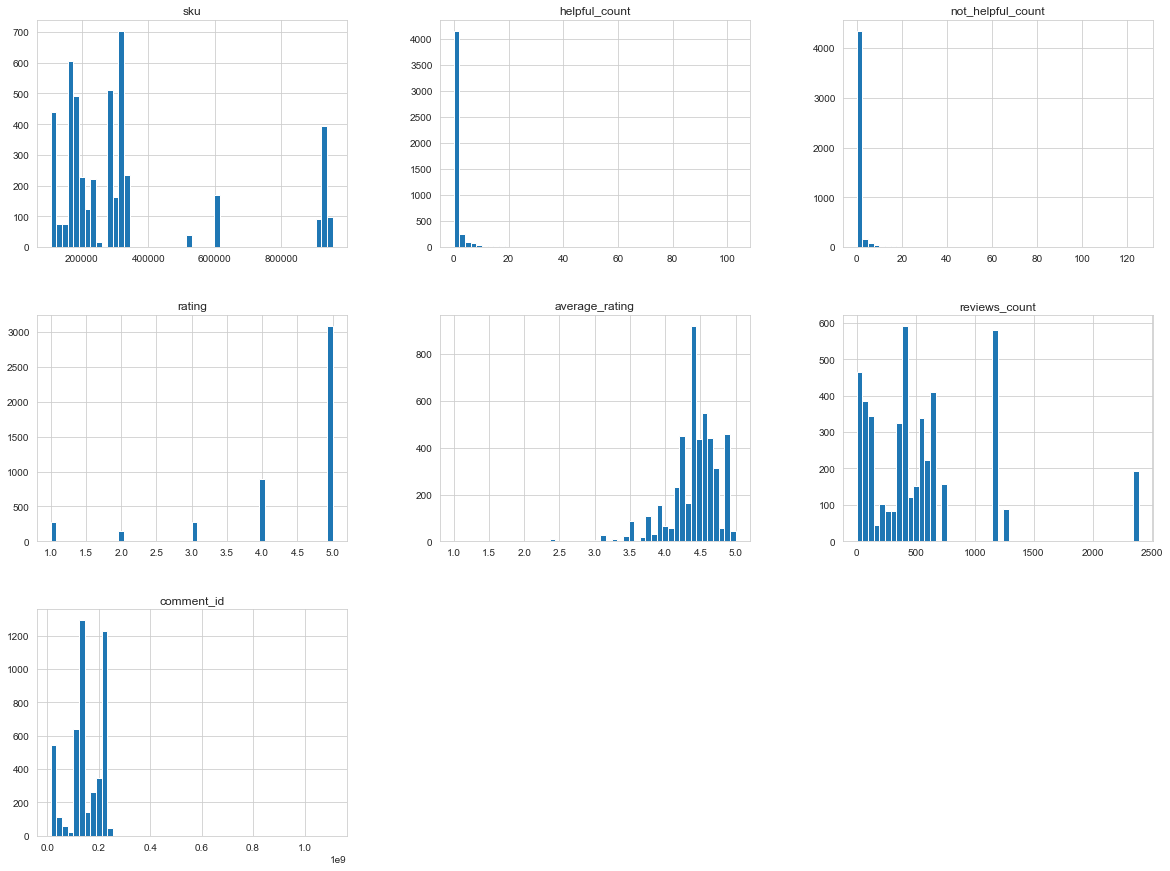

In [6]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

<h2>Split into Train/Test

* Before we explore the dataset we're going to split it into training set and test sets
* Our goal is to eventually train a sentiment analysis classifier
* Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don't train the classifier on imbalanced data

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit
dataAfter["rating"] = dataAfter["rating"].astype(int)

In [2]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

NameError: name 'StratifiedShuffleSplit' is not defined

<h5>Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [15]:
len(strat_train)

3748

In [17]:
len(strat_test)

938

In [16]:
strat_train["rating"].value_counts()/len(strat_train)

5    0.659285
4    0.190235
1    0.060566
3    0.058164
2    0.031750
Name: rating, dtype: float64

<h2> Data Exploration (Training Set)

In [18]:
reviews = strat_train.copy()
reviews.head(2)

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
2225,https://www.gamestop.com/video-games/playstati...,Hunting Simulator - PlayStation 4,Maximum Games,150357,Graham26,Great and enjoyable,I got this game to see what it's like and I ca...,yes: I recommend this product,NaN,1,1,3 years ago,NaN,5,3.1529,85,https://www.gamestop.com/on/demandware.store/S...,121095344,f5211eff-7efe-5f51-b969-1477ae55d4a0,16/01/2022 16:18:56
4621,https://www.gamestop.com/consoles-hardware/des...,Samsung 49-in Super Ultra-Wide Dual QHD (5120x...,Samsung,277492,TechSravan,Amazing! Like never before,[This review was collected as part of a promot...,No: I don’t recommend this product,NaN,0,0,1 month ago,NaN,5,4.5319,643,https://www.gamestop.com/on/demandware.store/S...,212269156,d18b1e3a-8263-5bc8-918b-8085f3f7497c,16/01/2022 16:19:31


considering brand for analysis

In [19]:
len(reviews["brand"].unique())

66

In [23]:
reviews.groupby("brand")["name"].unique()

brand
2K Games                                          [WWE 2K19 - PlayStation 4, Borderlands 2]
Activision                                              [Angry Birds: Star Wars - Xbox One]
Aluratek                                  [Aluratek Fast Charge Black Power Bank with Du...
Apple                                                       [iPhone 12 Pro 128GB - Verizon]
AreYouGame                                             [Diamond 3D Crystal Puzzle 43 Piece]
                                                                ...                        
VIZIO                                     [VIZIO 55-in Class OLED 4K HDR Smart TV OLED55...
WITHit                                    [WITHit Dabney Lee Apple Watch 38/40/41mm Band...
Warner Bros. Interactive Entertainment    [Injustice: Gods Among Us Ultimate Edition - X...
XSEED Games                               [Senran Kagura Peach Beach Splash - No Shirt, ...
Yok                                              [Yok Ultimate Case XL for

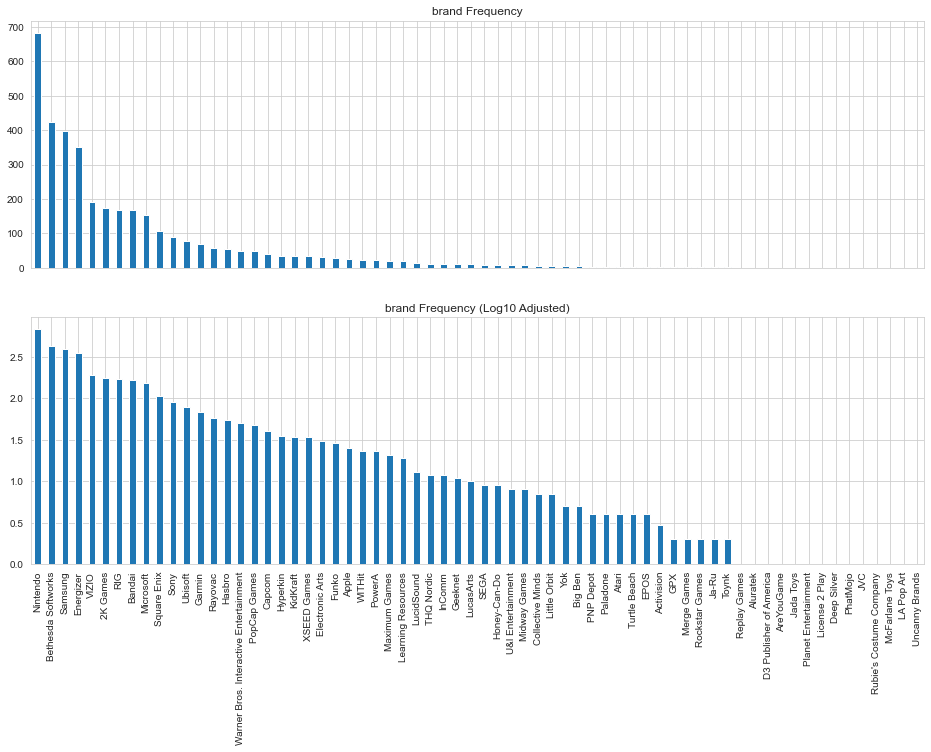

In [31]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["brand"].value_counts().plot(kind="bar", ax=ax1, title="brand Frequency")
np.log10(reviews["brand"].value_counts()).plot(kind="bar", ax=ax2, title="brand Frequency (Log10 Adjusted)") 
np.log(csv.log if i in D, 
      i==12
      then generate counts())

In [32]:
# Entire training dataset average rating
reviews["rating"].mean()

4.355923159018143

<h5>rating/brand

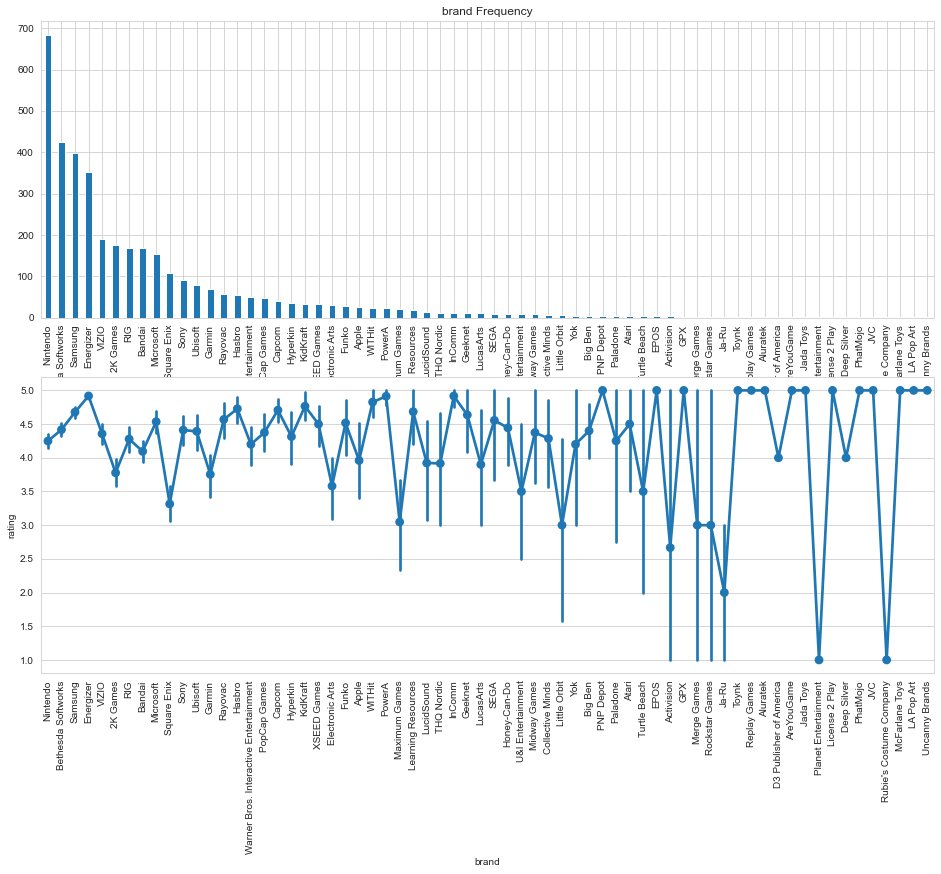

In [101]:
color = "orange"
asins_count_ix = reviews["brand"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["brand"].value_counts().plot(kind="bar", title="brand Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="brand", y="rating", order=asins_count_ix, 
              data=reviews)
plt.xticks(rotation=90)
plt.show()

* The most frequently reviewed brands have their average review ratings in the 3 - 4.8 range, with little variance
* Although there is a slight inverse relationship between the brand frequency level and average review ratings for the first 4 brands, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 - 4.8, which is considered good overall reviews


* Note that point-plot graph automatically takes the average of the review.rating data

<h2>comparing recommendations reviews for all brands

In [41]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
fig = px.histogram(reviews, x="recommended_review")
fig.update_traces(marker_color="darkslateblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Products rating')
fig.show()

<h3>most recommended products by people(above chart)

In [44]:
corr_matrix = reviews.corr()
corr_matrix

,sku,helpful_count,not_helpful_count,rating,average_rating,reviews_count,comment_id,recommendations
sku,1.000000,0.190141,0.121969,0.033466,0.052531,-0.250929,-0.409053,0.131871
helpful_count,0.190141,1.000000,0.295764,-0.076832,-0.122403,-0.058021,-0.271444,0.025345
not_helpful_count,0.121969,0.295764,1.000000,-0.285978,-0.086487,-0.042213,-0.197341,-0.141454
rating,0.033466,-0.076832,-0.285978,1.000000,0.374792,0.021190,0.118612,0.448427
average_rating,0.052531,-0.122403,-0.086487,0.374792,1.000000,0.179366,0.214932,0.212159
reviews_count,-0.250929,-0.058021,-0.042213,0.021190,0.179366,1.000000,-0.116526,-0.005223
comment_id,-0.409053,-0.271444,-0.197341,0.118612,0.214932,-0.116526,1.000000,-0.208163
recommendations,0.131871,0.025345,-0.141454,0.448427,0.212159,-0.005223,-0.208163,1.000000


In [143]:
count = reviews["name"].value_counts().to_frame()
count.head()

,name
Energizer MAX Alkaline Batteries 8 Pack - D,351
Samsung 49-in Super Ultra-Wide Dual QHD (5120x1440) 120Hz Curved Gaming Monitor C49RG9,338
Fallout 4 - PlayStation 4,300
Pokemon Black - Nintendo DS,258
VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,191


In [144]:
avg_ratings = reviews.groupby("name")["rating"].mean().to_frame()


In [145]:
tables = count.join(avg_ratings)
tables.head(30)

,name,rating
Energizer MAX Alkaline Batteries 8 Pack - D,351,4.917379
Samsung 49-in Super Ultra-Wide Dual QHD (5120x1440) 120Hz Curved Gaming Monitor C49RG9,338,4.757396
Fallout 4 - PlayStation 4,300,4.383333
Pokemon Black - Nintendo DS,258,4.375969
VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,191,4.356021
RIG 800HS Wireless Gaming Headset for PlayStation 4,169,4.278107
WWE 2K19 - PlayStation 4,164,3.756098
Yoshi's Crafted World - Nintendo Switch,149,4.671141
The Legend of Zelda: A Link Between Worlds - Nintendo 3DS,137,4.605839
Nintendo Switch Joy-Con (L) Wireless Controller Neon Blue,135,3.155556


,name,rating
name,1.000000,0.034633
rating,0.034633,1.000000


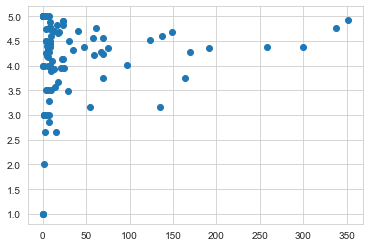

In [149]:
plt.scatter("name", "rating", data=tables)
tables.corr()

In [47]:
counts = reviews["brand"].value_counts().to_frame()
counts.head()

,brand
Nintendo,683
Bethesda Softworks,424
Samsung,397
Energizer,351
VIZIO,191


In [48]:
avg_rating = reviews.groupby("brand")["rating"].mean().to_frame()
avg_rating

,rating
brand,
2K Games,3.777143
Activision,2.666667
Aluratek,5.000000
Apple,3.960000
AreYouGame,5.000000
...,...
VIZIO,4.356021
WITHit,4.826087
Warner Bros. Interactive Entertainment,4.200000


In [156]:
table = counts.join(avg_rating)
table.head(5)

,brand,rating
Nintendo,683,4.248902
Bethesda Softworks,424,4.417453
Samsung,397,4.677582
Energizer,351,4.917379
VIZIO,191,4.356021


,brand,rating
brand,1.000000,0.081403
rating,0.081403,1.000000


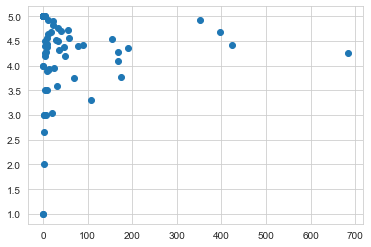

In [50]:
plt.scatter("brand", "rating", data=table)
table.corr()

* From our analysis in data exploration above between brands and rating, we discovered that there are many brand with low occurrence that have high variances, as a result we concluded that theses low occurrence brands are not significant in our analysis given the low sample size.

* Similarly in our correlation analysis between brands and rating, we see that there is almost no correlation which is consistent with our findings

<h1>Sentiment Analysis

>Using the features in place, we will build a classifier that can determine a review's sentiment.

<h3>Set Target Variable (Sentiments)

Segregate ratings from 1-5 into positive, neutral, and negative.

In [51]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train["Sentiment"][:20]

2225    Positive
4621    Positive
2485    Positive
3165    Positive
3155    Positive
3020    Positive
522     Positive
2272    Negative
4411    Positive
369      Neutral
2878    Positive
1716    Positive
4670    Negative
3088    Positive
1924    Positive
4592    Positive
486     Positive
4308    Positive
4042    Positive
2495    Positive
Name: Sentiment, dtype: object

In [170]:
fig = px.histogram(df_new, x="Sentiment")
fig.update_traces(marker_color="coral",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Products rating')
fig.show()

above graph shows the sentiments of the text reviews

====================================================================================================================

<h2>we can also set sentiments on text by using <h2>Vader_lexicon</h2> will try!!!

In [158]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gogo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [159]:
sentiments = SentimentIntensityAnalyzer()

In [160]:
#checking polarity percentage of example sentences
example1 = " i love this bike and i love to ride it"
example2 = "i borrowed it"
example3 = "i dont like this bike"
print("Positive_sentence:", sentiments.polarity_scores(example1))
print("Negative_sentence:", sentiments.polarity_scores(example3))
print("Neutral_sentence:", sentiments.polarity_scores(example2))

Positive_sentence: {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.8555}
Negative_sentence: {'neg': 0.413, 'neu': 0.587, 'pos': 0.0, 'compound': -0.2755}
Neutral_sentence: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [169]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["review_description"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["review_description"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["review_description"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["review_description"]]


In [163]:
df_new = pd.DataFrame(df)

In [167]:
score = df_new["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_new["Sentiment"] = sentiment


In [166]:
df_new1 = df_new["Sentiment"]

In [168]:
df_new1

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
4681    Positive
4682    Positive
4683    Positive
4684    Positive
4685    Positive
Name: Sentiment, Length: 4686, dtype: object

=================================================================================================================

<h3>Further!!!!

In [69]:
# prepearing data
X_train = strat_train["review_description"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["review_description"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

3748 938


<h3> here we have 3748 training and 938 testing dataset

<h2>Extract Features</h2>

Here we will turn content into numerical feature vectors using the <b>Bag of Words</b> strategy:

* Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
X[i,j] 
* where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)

* In order to implement the Bag of Words strategy, we will use SciKit-Learn's <b>CountVectorizer</b> to performs the following:

<h3>Text preprocessing</h3>

* 1) Tokenization (breaking sentences into words)
* 2) Stopwords (filtering "the", "are", etc)
* 3) Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
* 4) Feature Vector (converts the dictionary of text documents into a feature vector)

In [70]:
# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(3748, 8972)

>Here we have 3748 training samples and 8972 distinct words in our training sample.

Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use TfidfTransformer to reduce this redundancy:

* Term Frequencies (Tf) divides number of occurrences for each word by total number of words
* Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3748, 8972)

<h2>Building a Pipeline from the Extracted Features</h2>
<h3>We will use Multinominal Naive Bayes as our Classifier</h3>

* Multinominal Niave Bayes is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i)

* Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [73]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.849680170575693

Here we see that our Multinominal Naive Bayes Classifier has a 84.96% accuracy level based on the features.

Next we will conduct the following:

* Test other models

<h2> Test model

<h3>Logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.8624733475479744

<h3>Support Vector Machine Classifier

In [117]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.8837953091684435

<h3>DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8208955223880597

<h3>RandomForestclassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.8550106609808102

>>Looks like all the models performed well (>80%), and we will use the <b>Support Vector Machine</b> Classifier since it has the highest accuracy level at 88.37%.

Support Vector Machines is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

<h2>Fine tuning the Support Vector Machine Classifier

* Here we will run a Grid Search of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain(ie. use_idf in tfidftransformer)
* We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
* Finally we will test the accuracy of our final classifier(after fine-tuning)

In [157]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)

In [125]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.8805970149253731

In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

    Negative       0.74      0.40      0.52        87
     Neutral       0.50      0.02      0.04        54
    Positive       0.89      0.99      0.94       797

    accuracy                           0.88       938
   macro avg       0.71      0.47      0.50       938
weighted avg       0.85      0.88      0.85       938

Accuracy: 0.8805970149253731


In [135]:
from sklearn import metrics
y = metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

In [137]:
y

array([[ 35,   0,  52],
       [  6,   1,  47],
       [  6,   1, 790]], dtype=int64)

<AxesSubplot:>

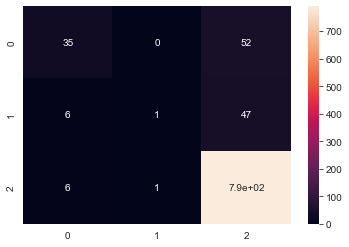

In [136]:
import seaborn as sns
sns.heatmap(y, annot=True)

<AxesSubplot:>

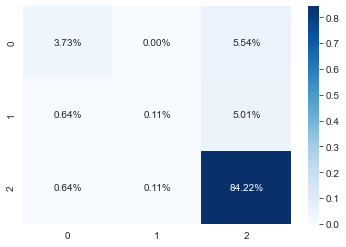

In [138]:
sns.heatmap(y/np.sum(y), annot=True, 
            fmt='.2%', cmap='Blues')